In [1]:
import torch

save_name = "qwen-1.5b"

save_name_to_idx_map = {
    "qwen-1.5b": 0,
    "qwen-7b": 1,
    "qwen-14b": 2,
}

name_to_model_map = {
    "qwen-1.5b": ["Qwen/Qwen2.5-Math-1.5B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"],
    "qwen-7b": ["Qwen/Qwen2.5-Math-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"],
    "qwen-14b": ["Qwen/Qwen2.5-14B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"],
}

weight_path = f"./checkpoints/version_{save_name_to_idx_map[save_name]}/{save_name}_6.pt"
weights = torch.load(weight_path, map_location="cpu")
print(weights.keys())

/tmp/ipykernel_3863701/3075779463.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(weight_path, map_location="cpu")


odict_keys(['W_enc', 'W_dec', 'b_enc', 'b_dec'])


In [2]:
base_dec = weights["W_dec"][:, 0, :]
reasoning_dec = weights["W_dec"][:, 1, :]
print(base_dec.shape, reasoning_dec.shape)
base_norms = torch.norm(base_dec, p=1, dim=1)
reasoning_norms = torch.norm(reasoning_dec, p=1, dim=1)

torch.Size([32768, 1536]) torch.Size([32768, 1536])


In [ ]:
dot = base_dec[:4096] @ base_dec[:4096].T



(array([4.000000e+00, 6.800000e+01, 7.080000e+02, 7.268000e+03,
        4.767000e+04, 2.372960e+05, 8.503040e+05, 2.119500e+06,
        3.616924e+06, 4.135810e+06, 3.101698e+06, 1.564745e+06,
        6.377370e+05, 2.551710e+05, 9.846200e+04, 4.428600e+04,
        2.169400e+04, 1.143000e+04, 7.221000e+03, 4.374000e+03,
        2.968000e+03, 2.024000e+03, 1.494000e+03, 1.046000e+03,
        7.420000e+02, 5.800000e+02, 4.660000e+02, 3.640000e+02,
        3.170000e+02, 2.250000e+02, 1.960000e+02, 1.410000e+02,
        1.680000e+02, 1.370000e+02, 1.110000e+02, 1.110000e+02,
        1.500000e+02, 1.210000e+02, 1.110000e+02, 1.280000e+02,
        1.290000e+02, 1.210000e+02, 1.120000e+02, 1.620000e+02,
        1.480000e+02, 1.420000e+02, 1.610000e+02, 1.530000e+02,
        1.650000e+02, 1.830000e+02, 1.660000e+02, 1.460000e+02,
        1.520000e+02, 1.410000e+02, 1.000000e+02, 1.320000e+02,
        1.190000e+02, 1.120000e+02, 8.000000e+01, 7.800000e+01,
        8.200000e+01, 5.900000e+01, 6.10

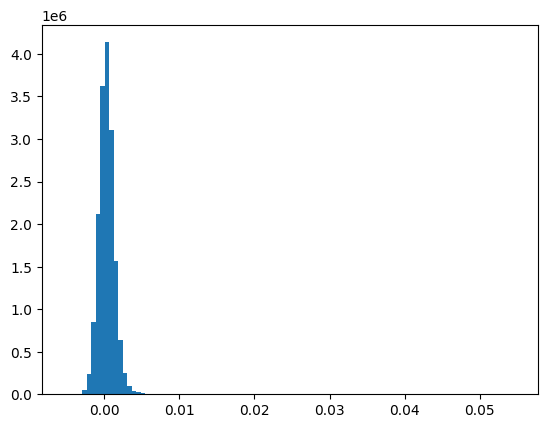

In [6]:
import matplotlib.pyplot as plt
plt.hist(dot.float().flatten(), bins=100)

In [92]:
new_filename = "./results/" + weight_path[2:-3].replace("/","__") + "_wait.json"

import json
with open(new_filename, 'r') as f:
    data = json.load(f)
    
cnt = 0
for key in data.keys():
    if data[key] > 500:
        cnt += 1
print(cnt)

1069


In [93]:
new_data = []
for key in data.keys():
    if data[key] > 1000:
        rel_norm = reasoning_norms[int(key)] / base_norms[int(key)]
        normalized_relative_norms = rel_norm / (1 + rel_norm)
        new_data.append(normalized_relative_norms.item())

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  1.,  2.,  5.,  3.,  4.,  7.,  8.,  5., 20.,
        35., 53., 36., 59., 52., 53., 44., 48., 30., 27., 20., 14., 13.,
         7.,  5.,  5.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  1.]),
 array([6.38961792e-05, 1.81094933e-02, 3.61550903e-02, 5.42006874e-02,
        7.22462845e-02, 9.02918816e-02, 1.08337479e-01, 1.26383076e-01,
        1.44428673e-01, 1.62474270e-01, 1.80519867e-01, 1.98565464e-01,
        2.16611061e-01, 2.34656658e-01, 2.52702255e-01, 2.70747852e-01,
        2.88793449e-01, 3.06839046e-01, 3.24884644e-01, 3.42930241e-01,
        3.60975838e-01, 3.79021435e-01, 3.97067032e-01, 4.15112629e-01,
        4.33158226e-01, 4.51203823e-01, 4.69249420e-01, 4.87295017e-01,
        5.05340614e-01, 5.23386211e-01, 5.41431808e-01, 5.59477406e-01,
        5.77523003e-01, 5.95568600e-01, 6.13614197e-01, 6.31659794e-01,
        6.49705391e-01, 6.67750988e-01, 6.85796585e-01, 7.03842182e-

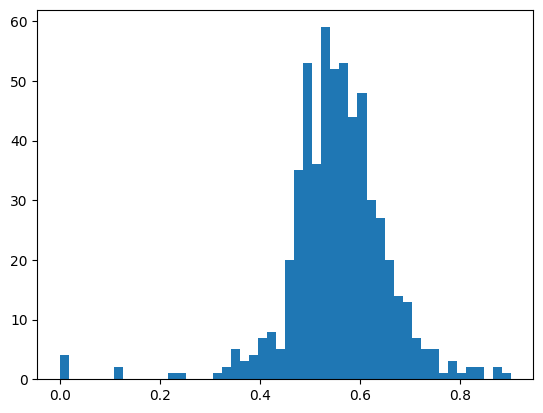

In [94]:
plt.hist(new_data, bins=50)

In [41]:
import numpy as np
np.median(new_data)

np.float64(0.53125)

In [1]:
from transformer_lens import HookedTransformer, ActivationCache
import torch
import os
os.environ['HF_HOME'] = '/om2/user/dbaek/.cache/'

device = "cuda" if torch.cuda.is_available() else "cpu"

save_name = "qwen-1.5b"

name_to_model_map = {
    "qwen-1.5b": ["Qwen/Qwen2.5-Math-1.5B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"],
    "qwen-7b": ["Qwen/Qwen2.5-Math-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"],
    "qwen-14b": ["Qwen/Qwen2.5-14B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"],
}

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(name_to_model_map[save_name][0])


base_model = HookedTransformer.from_pretrained(
    name_to_model_map[save_name][0],
    device=device, 
)

chat_model = HookedTransformer.from_pretrained(
    name_to_model_map[save_name][1],
    device=device, 
)



/om/user/dbaek/.conda/envs/crosscoder/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loaded pretrained model Qwen/Qwen2.5-Math-1.5B into HookedTransformer


Loaded pretrained model deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B into HookedTransformer


In [13]:
base_model.cfg.n_layers

28

torch.Size([9, 1])
0 [0.25694174 0.15080875]
torch.Size([9, 1])
1 [0.23454906 0.16806667]
torch.Size([9, 1])
2 [0.4239563  0.17159887]
torch.Size([9, 1])
3 [0.41956067 0.19300961]
torch.Size([9, 1])
4 [0.34752983 0.21791752]
torch.Size([9, 1])
5 [0.3003466  0.20177545]
torch.Size([9, 1])
6 [0.3027281  0.21020748]
torch.Size([9, 1])
7 [0.2937232  0.20897098]
torch.Size([9, 1])
8 [0.2865917  0.20692247]
torch.Size([9, 1])
9 [0.28870377 0.20387878]
torch.Size([9, 1])
10 [0.29199186 0.20303716]
torch.Size([9, 1])
11 [0.28471807 0.20775896]
torch.Size([9, 1])
12 [0.28843963 0.21067598]
torch.Size([9, 1])
13 [0.28326437 0.20888764]
torch.Size([9, 1])
14 [0.2883816  0.20653783]
torch.Size([9, 1])
15 [0.28577724 0.20546937]
torch.Size([9, 1])
16 [0.28298482 0.20726947]
torch.Size([9, 1])
17 [0.28152943 0.20684999]
torch.Size([9, 1])
18 [0.28528863 0.20737116]
torch.Size([9, 1])
19 [0.27377313 0.20004603]
torch.Size([9, 1])
20 [0.23997529 0.21605495]
torch.Size([9, 1])
21 [0.25083905 0.20810191

/tmp/ipykernel_3862747/2304191651.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


22 [0.24171928 0.18542743]
torch.Size([9, 1])
23 [0.2607827  0.19336963]
torch.Size([9, 1])
24 [0.2543844 0.203942 ]
torch.Size([9, 1])
25 [0.26462153 0.2045895 ]
torch.Size([9, 1])
26 [0.25976753 0.21951991]
torch.Size([9, 1])
27 [0.29926565 0.2328811 ]


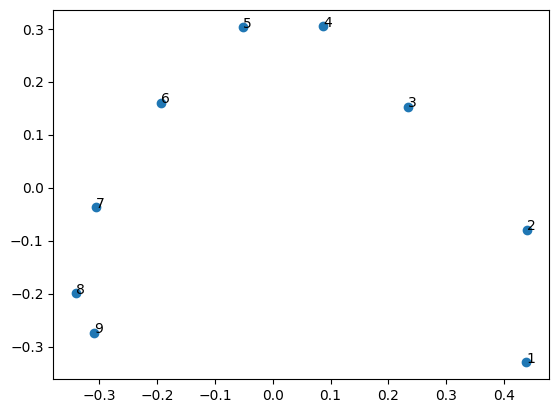

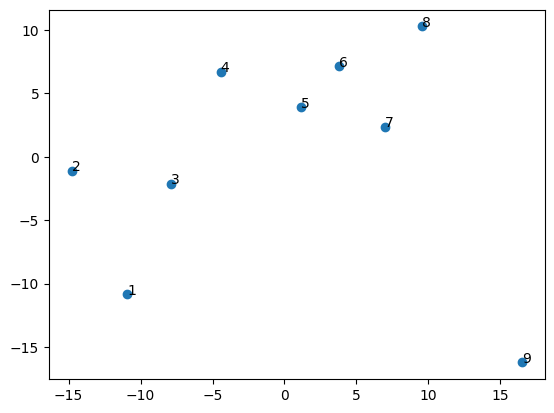

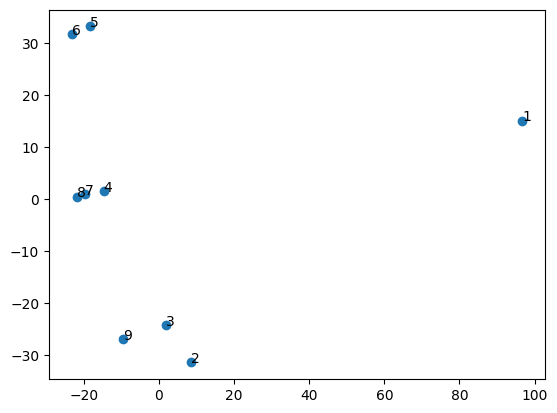

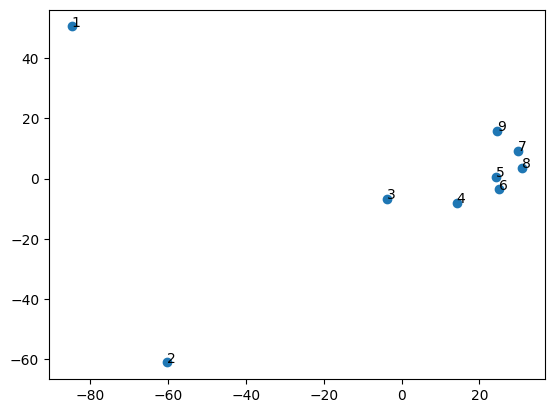

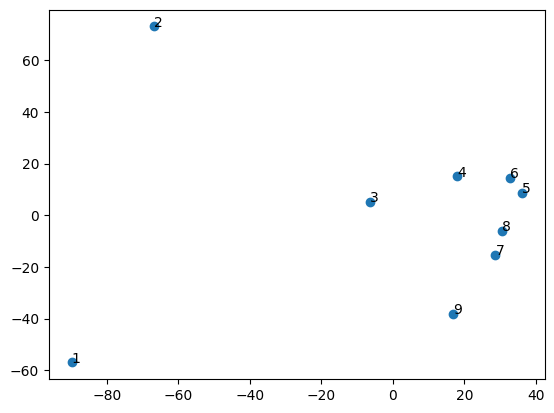

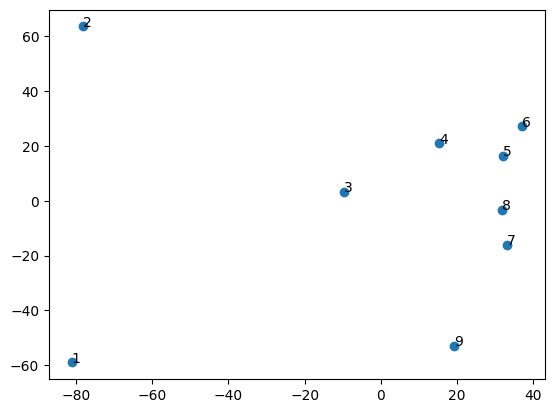

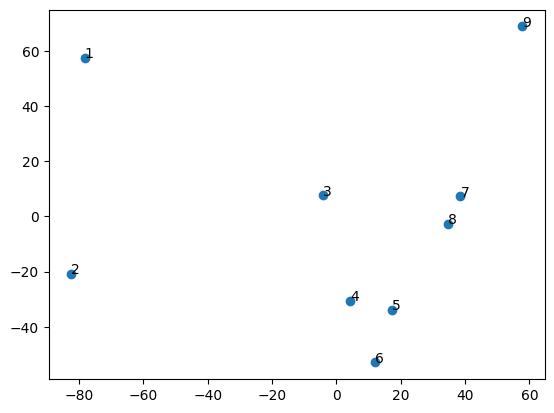

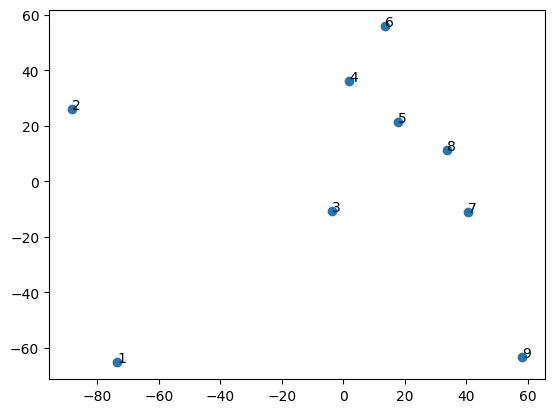

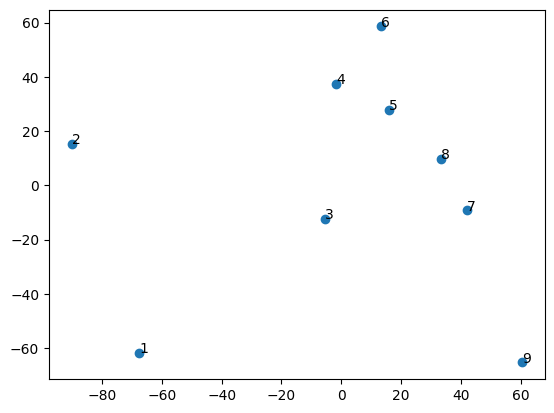

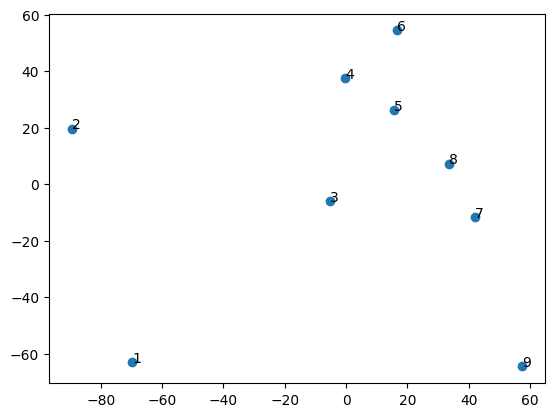

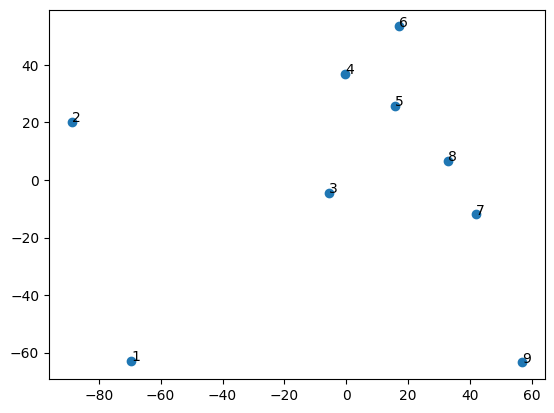

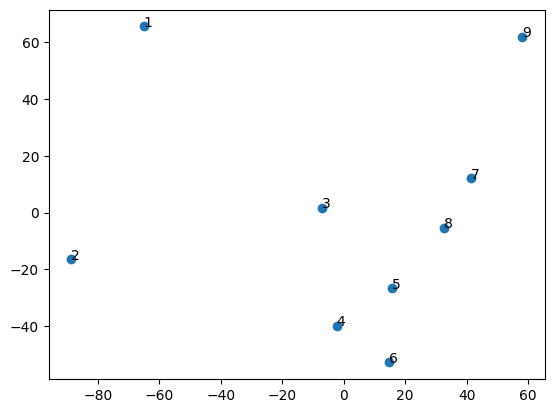

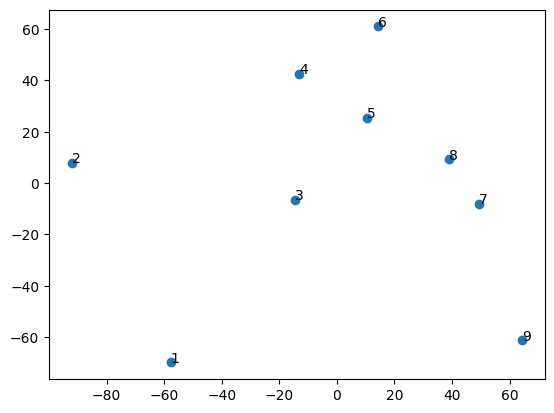

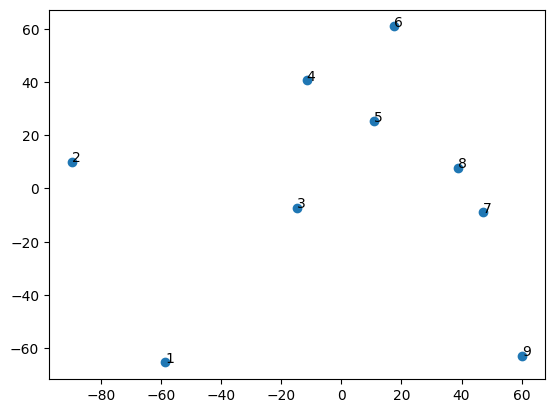

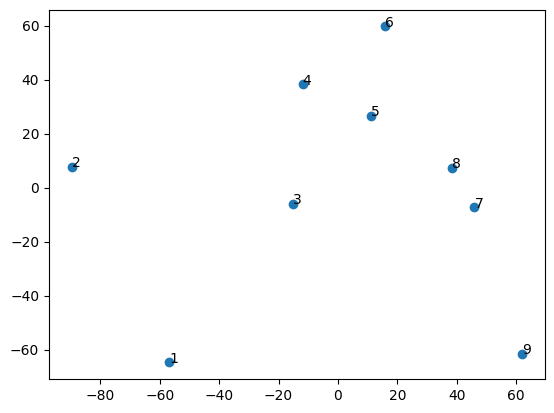

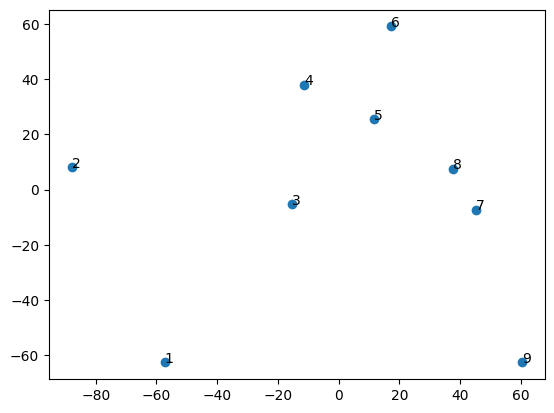

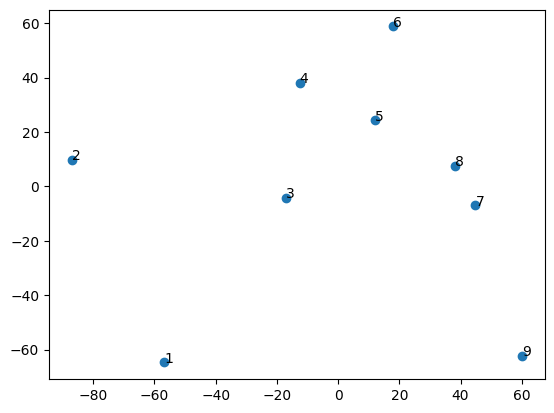

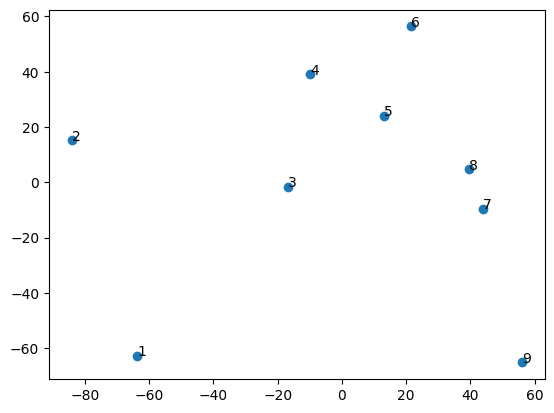

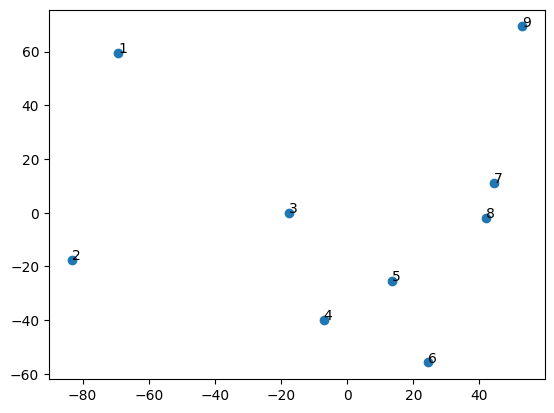

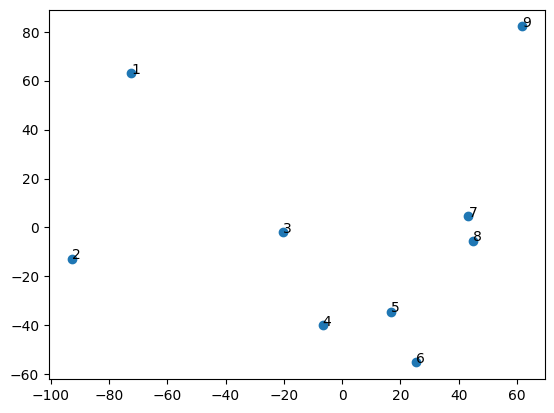

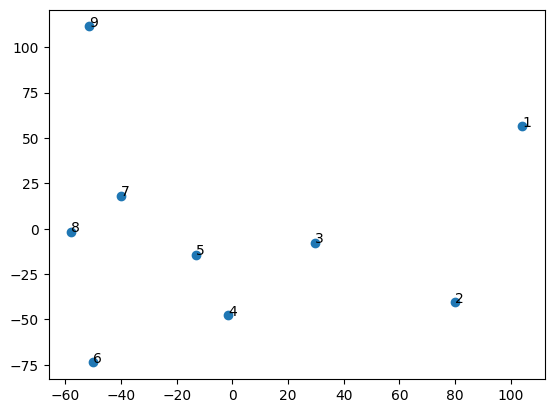

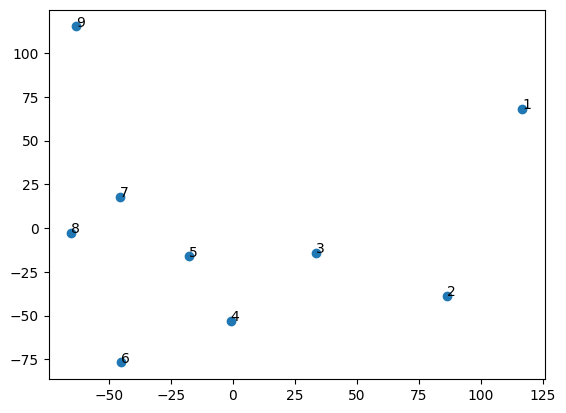

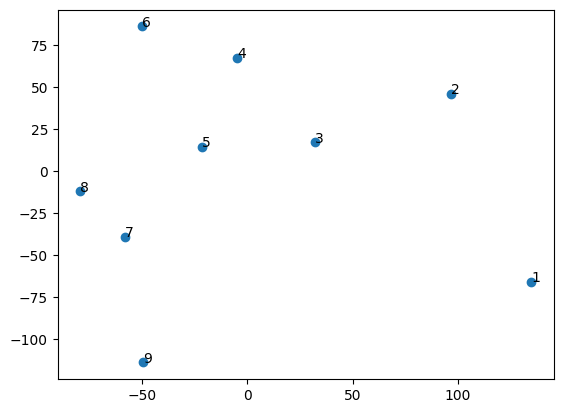

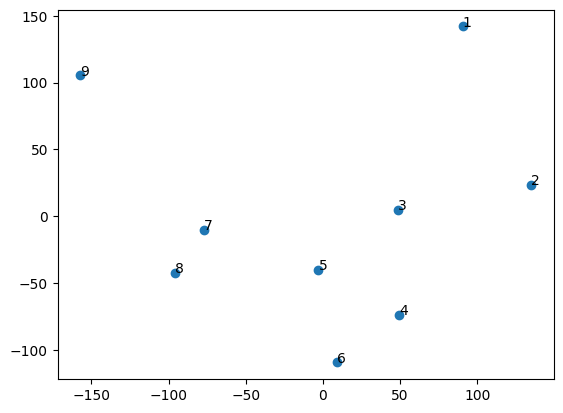

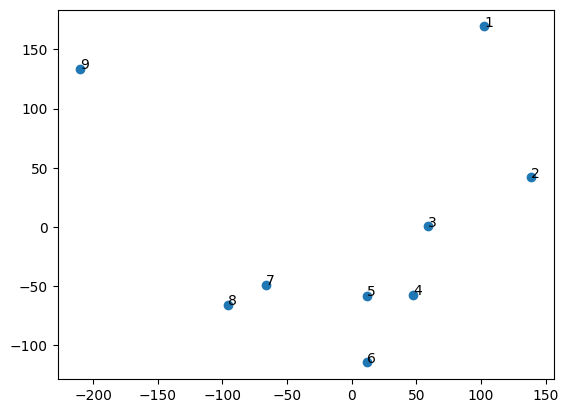

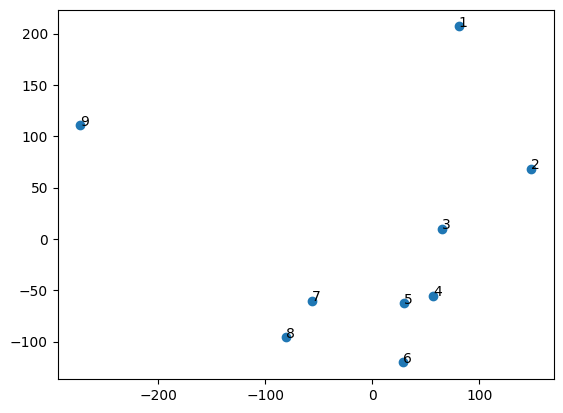

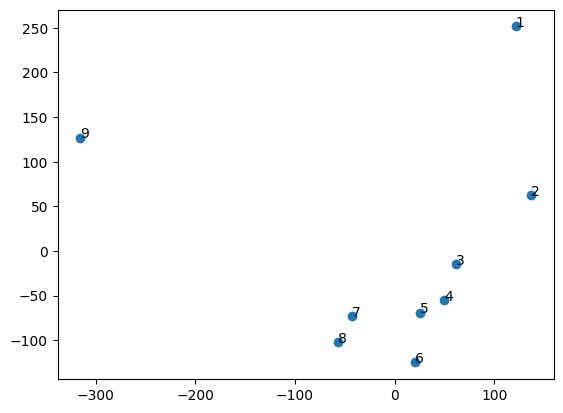

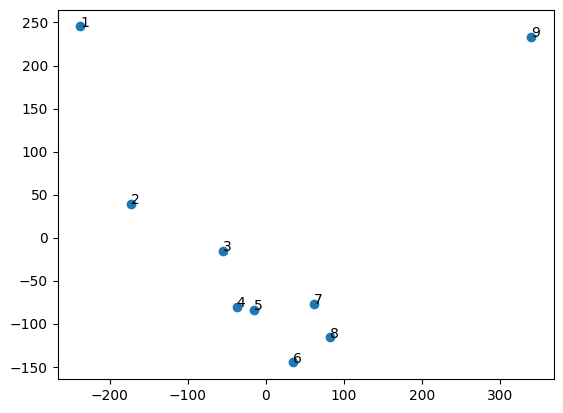

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

for layer in range(base_model.cfg.n_layers):
    torch.cuda.empty_cache()
    hook_point = f"blocks.{layer}.hook_resid_pre"
    prompt = [str(x) for x in range(1, 10)]
#    prompt = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#    prompt = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    tokens = tokenizer(prompt, return_tensors="pt")['input_ids'].to(device)
    print(tokens.shape)

    _, cache_A = base_model.run_with_cache(tokens, names_filter=hook_point)
    _, cache_B = chat_model.run_with_cache(tokens, names_filter=hook_point)

    rep_A = cache_A[hook_point][:,-1,:]
    pca = PCA(n_components=2)
    A_pca = pca.fit_transform(rep_A.cpu().detach().numpy())
    print(layer,pca.explained_variance_ratio_)
    plt.figure()
    plt.scatter(A_pca[:, 0], A_pca[:, 1])

    for i in range(len(prompt)):
        plt.text(A_pca[i, 0], A_pca[i, 1], prompt[i])

[0.28838155 0.20653796]


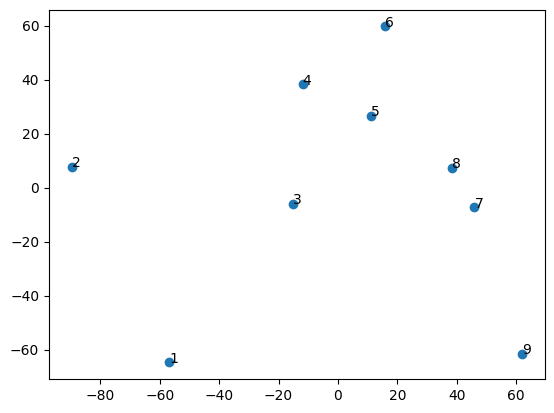